# Exploratory Data Analysis

In [1]:
# Import packages relevant for all models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Load in modeling data from /data
eda_df = pd.read_csv('data/weather_with_avg_hourly_flight_delay.csv', index_col=False)

In [3]:
eda_df.head()

,DATE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlySeaLevelPressure,HourlyStationPressure,HourlyPressureChange,HourlyPressureTendency,HourlyVisibility,HourlyWindSpeed,...,HourlyRelativeHumidity,REPORT_TYPE,cloud_1,cloud_0,wind_north,wind_east,wind_south,wind_west,join_time,avg_delay
0,2017-12-01T00:53:00,30.14,40.0,45.0,30.16,29.67,-0.00,3.0,10.0,13.0,...,83.0,FM-15,0,1,0,0,1,0,2017120100,-6.600000
1,2017-12-01T01:53:00,30.13,39.0,44.0,30.16,29.66,0.00,0.0,10.0,10.0,...,83.0,FM-15,0,1,0,0,1,0,2017120101,-10.000000
2,2017-12-01T05:53:00,30.08,36.0,42.0,30.10,29.61,0.00,0.0,10.0,10.0,...,79.0,FM-15,0,1,0,0,1,0,2017120105,-3.160000
3,2017-12-01T06:53:00,30.07,35.0,39.0,30.09,29.60,0.04,6.0,10.0,8.0,...,86.0,FM-15,0,1,0,0,1,0,2017120106,1.187500
4,2017-12-01T07:53:00,30.06,36.0,41.0,30.09,29.59,0.00,0.0,10.0,7.0,...,82.0,FM-15,1,0,0,0,1,0,2017120107,4.147541


In [4]:
eda_df.shape

(7888, 24)

In [5]:
# Make the index the datetime for easier plotting
date_t = eda_df.DATE.astype(dtype='datetime64')
eda_df.index = date_t
#eda_df.head()

In [6]:
# The summary statistics for average delay time
eda_df.describe()

,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlySeaLevelPressure,HourlyStationPressure,HourlyPressureChange,HourlyPressureTendency,HourlyVisibility,HourlyWindSpeed,HourlyPrecipitation,...,HourlyWindDirection,HourlyRelativeHumidity,cloud_1,cloud_0,wind_north,wind_east,wind_south,wind_west,join_time,avg_delay
count,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,...,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7.888000e+03,7888.000000
mean,30.074468,43.844954,54.476547,30.092742,29.605900,0.000063,1.389452,9.185772,8.152257,0.004588,...,179.066937,70.304894,0.370436,0.629564,0.320106,0.089123,0.422794,0.167977,2.017984e+09,5.580405
std,0.192861,8.348345,12.139054,0.194837,0.190492,0.020326,2.570413,2.101811,4.399882,0.018504,...,105.613661,17.160235,0.482952,0.482952,0.466547,0.284939,0.494035,0.373869,2.608048e+05,12.326309
min,29.370000,9.000000,24.000000,29.380000,28.910000,-0.170000,0.000000,0.000000,0.000000,0.000000,...,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.017120e+09,-26.000000
25%,29.970000,38.000000,45.000000,29.980000,29.500000,0.000000,0.000000,10.000000,6.000000,0.000000,...,120.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.018030e+09,-0.945833
50%,30.080000,45.000000,53.000000,30.090000,29.610000,0.000000,0.000000,10.000000,8.000000,0.000000,...,190.000000,73.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.018060e+09,3.377155
75%,30.200000,50.000000,62.000000,30.220000,29.730000,0.000000,1.000000,10.000000,10.000000,0.000000,...,240.000000,83.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.018083e+09,9.037077
max,30.640000,61.000000,93.000000,30.660000,30.160000,0.200000,9.000000,10.000000,34.000000,0.360000,...,360.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.018113e+09,356.000000


In [7]:
eda_df.corr()

,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlySeaLevelPressure,HourlyStationPressure,HourlyPressureChange,HourlyPressureTendency,HourlyVisibility,HourlyWindSpeed,HourlyPrecipitation,...,HourlyWindDirection,HourlyRelativeHumidity,cloud_1,cloud_0,wind_north,wind_east,wind_south,wind_west,join_time,avg_delay
HourlyAltimeterSetting,1.000000,-0.240059,-0.184186,0.999350,0.999874,-0.056951,-0.019355,0.068968,-0.137866,-0.232329,...,-0.095781,-0.000710,-0.147892,0.147892,0.163669,-0.020167,-0.114055,-0.038157,-0.276419,-0.081396
HourlyDewPointTemperature,-0.240059,1.000000,0.752183,-0.263119,-0.244138,0.015570,-0.003886,-0.074885,-0.083999,0.030402,...,0.172333,-0.043168,-0.023741,0.023741,-0.126648,-0.180424,0.055153,0.222670,0.377351,0.109891
HourlyDryBulbTemperature,-0.184186,0.752183,1.000000,-0.209662,-0.188478,0.112177,0.058555,0.124314,-0.025902,-0.134172,...,0.295481,-0.677822,-0.300584,0.300584,0.032456,-0.176099,-0.181341,0.333335,0.393581,0.145998
HourlySeaLevelPressure,0.999350,-0.263119,-0.209662,1.000000,0.999357,-0.058110,-0.019437,0.065814,-0.134816,-0.227242,...,-0.101100,0.012816,-0.139330,0.139330,0.162311,-0.015342,-0.110232,-0.045191,-0.287599,-0.083077
HourlyStationPressure,0.999874,-0.244138,-0.188478,0.999357,1.000000,-0.056940,-0.019114,0.068380,-0.137293,-0.231044,...,-0.097265,0.001448,-0.146749,0.146749,0.164139,-0.018822,-0.114029,-0.039803,-0.278616,-0.081725
HourlyPressureChange,-0.056951,0.015570,0.112177,-0.058110,-0.056940,1.000000,0.423046,-0.031664,-0.040173,0.052624,...,0.030397,-0.141422,-0.001746,0.001746,0.023798,0.081118,-0.127795,0.077349,0.003403,0.036618
HourlyPressureTendency,-0.019355,-0.003886,0.058555,-0.019437,-0.019114,0.423046,1.000000,-0.026544,-0.008943,0.017076,...,0.040216,-0.084455,-0.018587,0.018587,0.008737,0.015444,-0.059191,0.055542,-0.008525,0.018977
HourlyVisibility,0.068968,-0.074885,0.124314,0.065814,0.068380,-0.031664,-0.026544,1.000000,0.101982,-0.358931,...,0.092898,-0.335481,-0.255124,0.255124,0.000917,-0.113580,0.024304,0.053303,0.132711,-0.162778
HourlyWindSpeed,-0.137866,-0.083999,-0.025902,-0.134816,-0.137293,-0.040173,-0.008943,0.101982,1.000000,0.060487,...,0.198148,-0.046463,0.074353,-0.074353,-0.182485,-0.048346,0.286587,-0.114132,-0.003960,-0.015131
HourlyPrecipitation,-0.232329,0.030402,-0.134172,-0.227242,-0.231044,0.052624,0.017076,-0.358931,0.060487,1.000000,...,-0.049427,0.276292,0.284383,-0.284383,-0.125348,0.134779,0.092498,-0.068528,-0.063180,0.011576


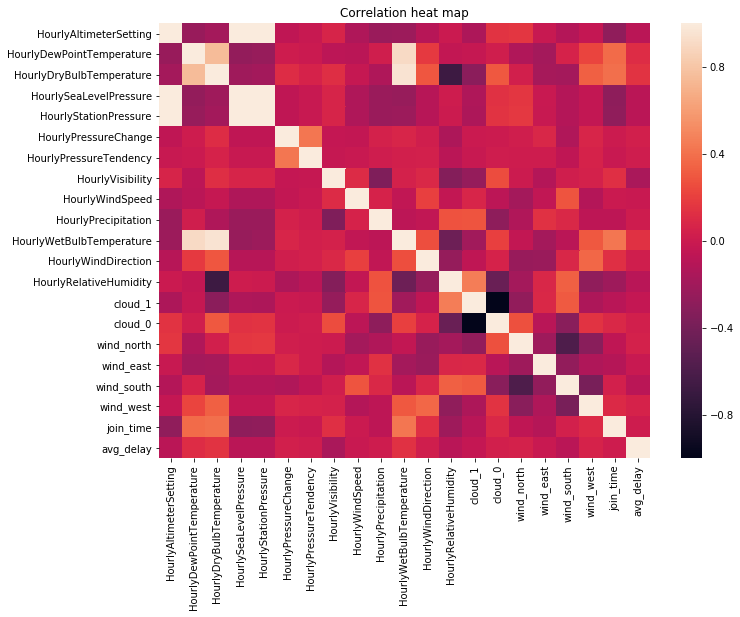

In [8]:
# Correlation of all variables
plt.figure(figsize=(11, 8))
corr_heat = sns.heatmap(eda_df.corr())
plt.title('Correlation heat map')
plt.show()

In [9]:
# Correlation of variables with average delay 
eda_df.corr().avg_delay.sort_values(ascending=False)

avg_delay                    1.000000
HourlyDryBulbTemperature     0.145998
HourlyWetBulbTemperature     0.135499
HourlyDewPointTemperature    0.109891
wind_west                    0.058965
wind_north                   0.047318
HourlyPressureChange         0.036618
cloud_0                      0.032135
HourlyWindDirection          0.027832
HourlyPressureTendency       0.018977
HourlyPrecipitation          0.011576
join_time                    0.009185
wind_east                   -0.007889
HourlyWindSpeed             -0.015131
cloud_1                     -0.032135
HourlyAltimeterSetting      -0.081396
HourlyStationPressure       -0.081725
HourlySeaLevelPressure      -0.083077
wind_south                  -0.084758
HourlyRelativeHumidity      -0.092357
HourlyVisibility            -0.162778
Name: avg_delay, dtype: float64

In [10]:
# Create dataframe with only the correlated variables 
corr_vars = ['avg_delay', 'HourlyDryBulbTemperature', 'HourlyWetBulbTemperature', 
             'HourlyDewPointTemperature', 'wind_west', 'wind_north', 'HourlyPressureChange', 
             'HourlyWindDirection', 'HourlyPressureTendency', 'HourlyPrecipitation', 'join_time']

corr_df = eda_df[corr_vars]
#corr_df.head()

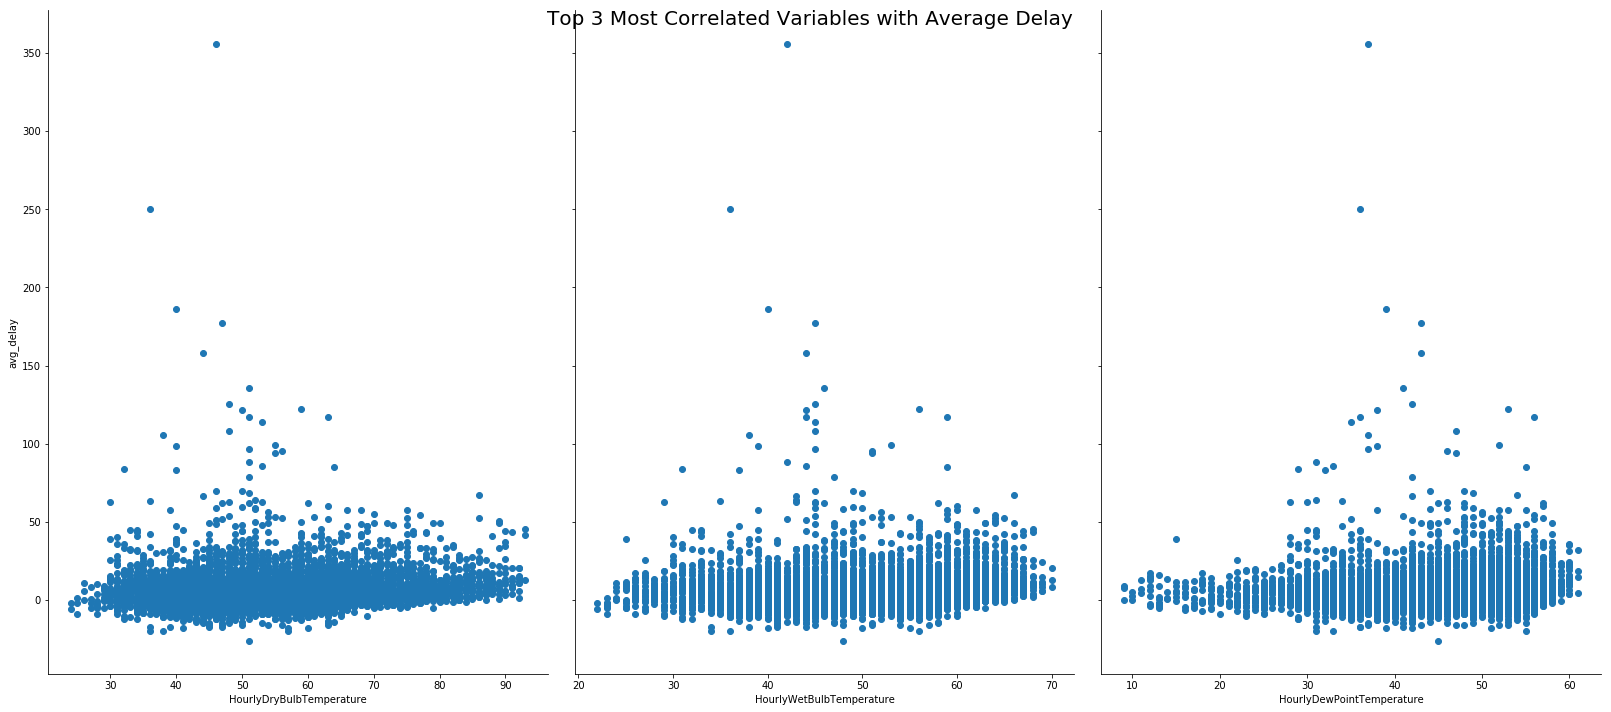

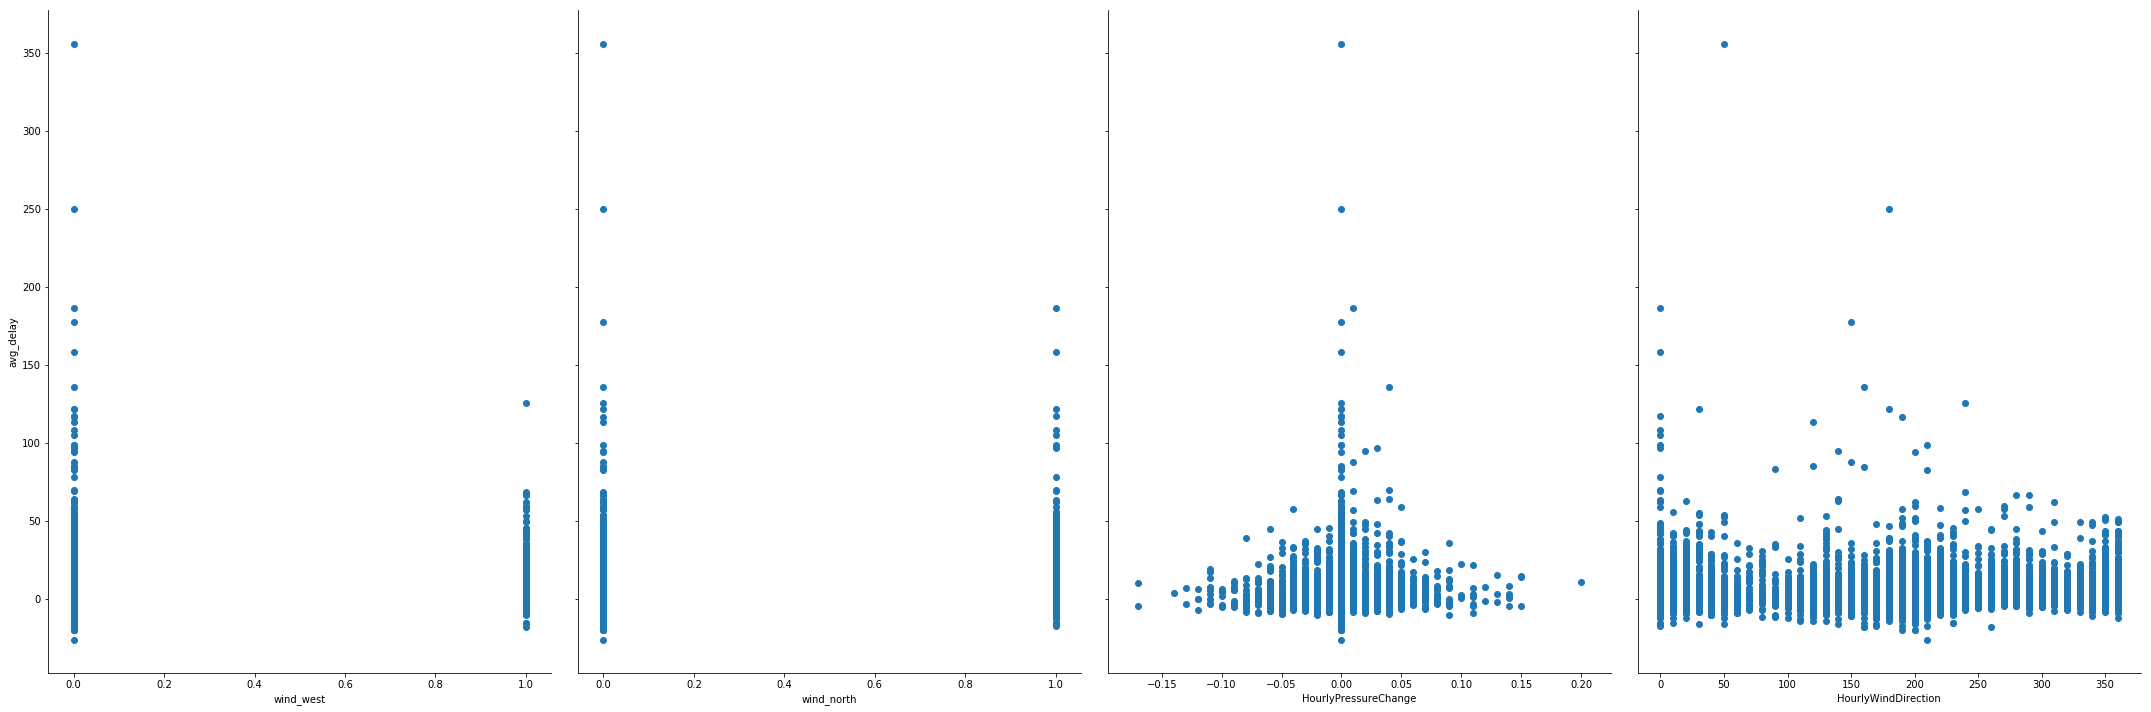

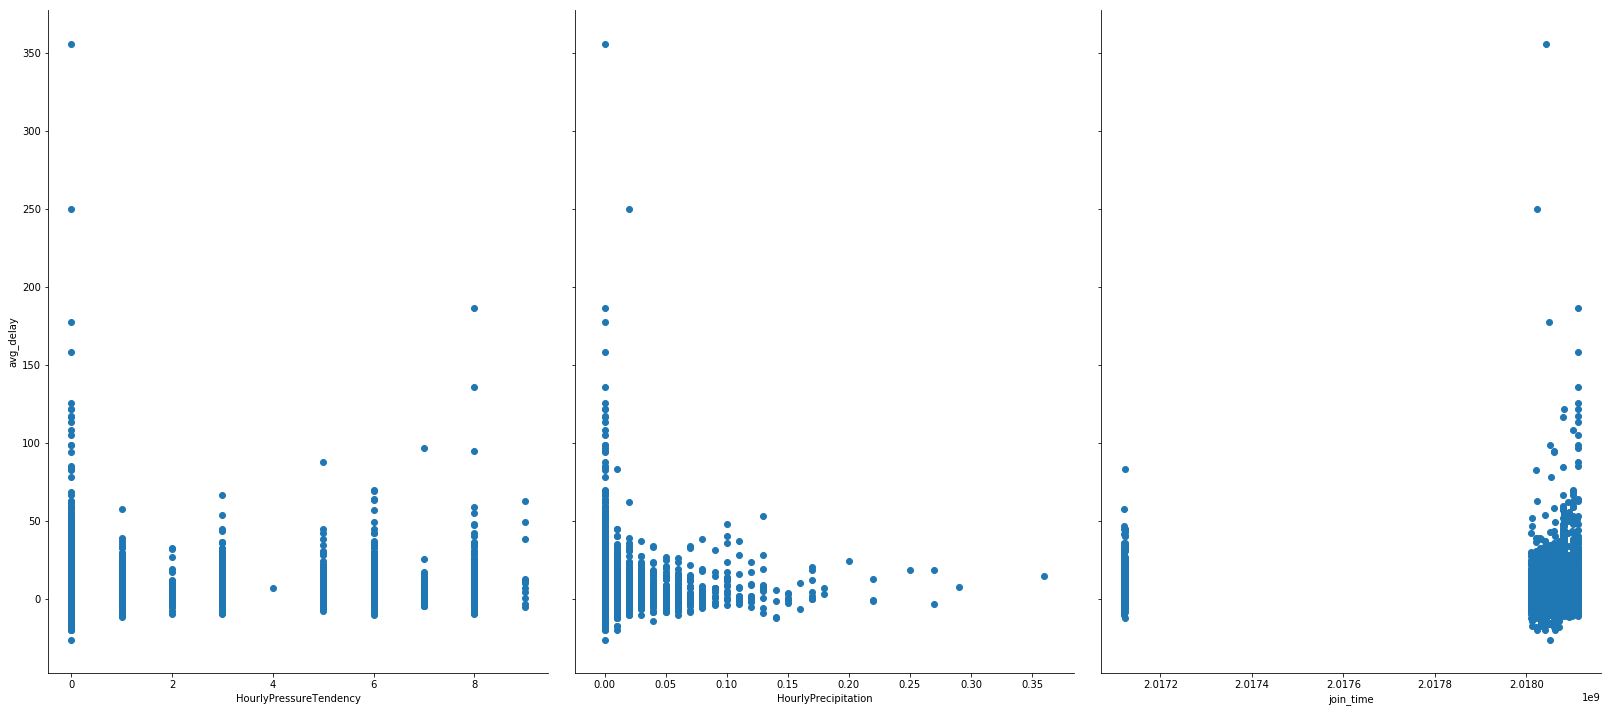

In [63]:
# Plot for each independent variable
g_1 = sns.PairGrid(eda_df,
                 x_vars=['HourlyDryBulbTemperature', 'HourlyWetBulbTemperature', 'HourlyDewPointTemperature'],
                 y_vars=['avg_delay'],
                 aspect=.75, height=10)
g_1.fig.suptitle('Top 3 Most Correlated Variables with Average Delay', fontsize=20)
g_1.map(plt.scatter)

g_2 = sns.PairGrid(eda_df,
                 x_vars=['wind_west', 'wind_north', 'HourlyPressureChange', 'HourlyWindDirection'],
                 y_vars=['avg_delay'],
                 aspect=.75, height=10)

g_2.map(plt.scatter)

g_3 = sns.PairGrid(eda_df,
                 x_vars=['HourlyPressureTendency', 'HourlyPrecipitation', 'join_time'],
                 y_vars=['avg_delay'],
                 aspect=.75, height=10)
g_3.map(plt.scatter)

plt.show()

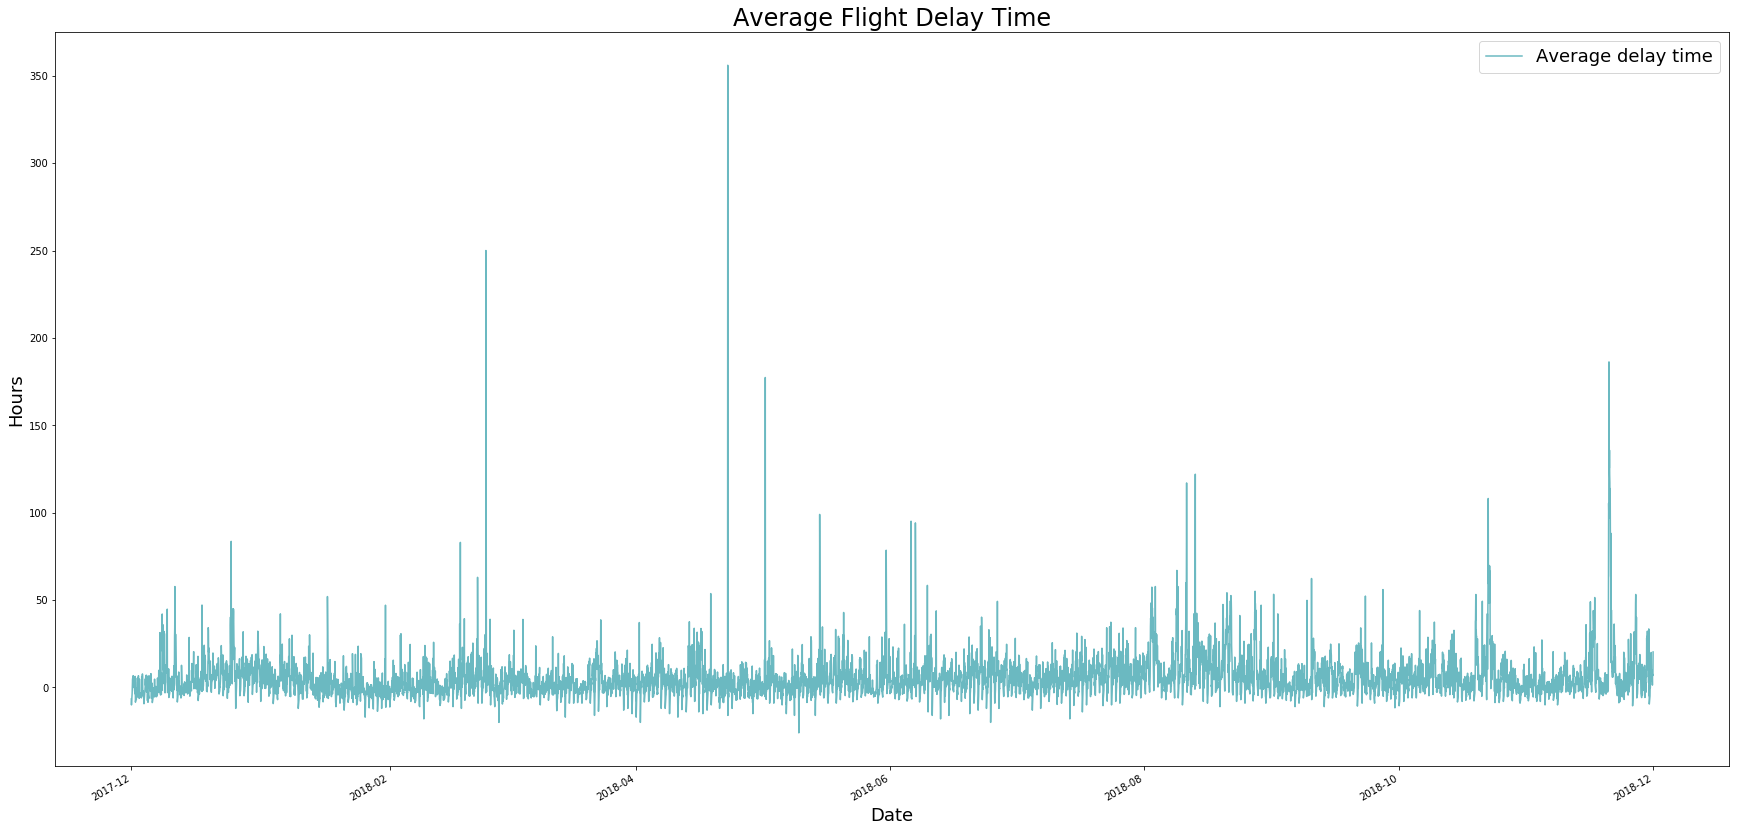

In [12]:
# Average delay 
plt.figure(figsize=(30,15))
eda_df.avg_delay.plot(color='#6BB9C1', label='Average delay time')
plt.title('Average Flight Delay Time', fontsize=24)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Hours', fontsize=18)
plt.legend(fontsize=18)
plt.show()

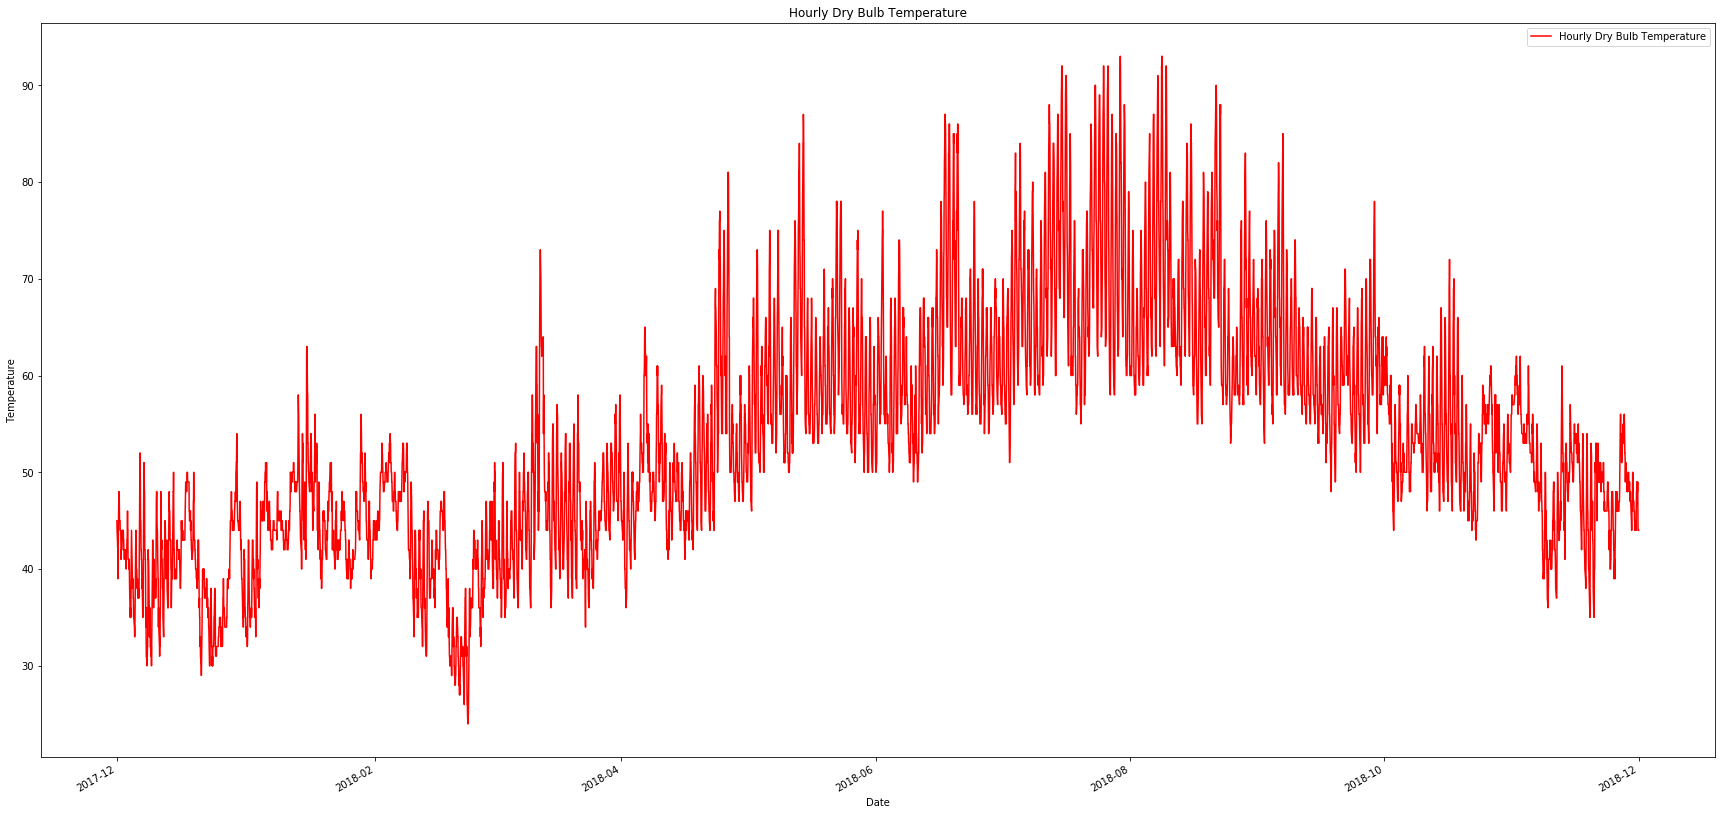

In [13]:
# Hourly Dry Bulb Temperature
plt.figure(figsize=(30,15))
eda_df.HourlyDryBulbTemperature.plot(color='red', label='Hourly Dry Bulb Temperature')
plt.title('Hourly Dry Bulb Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

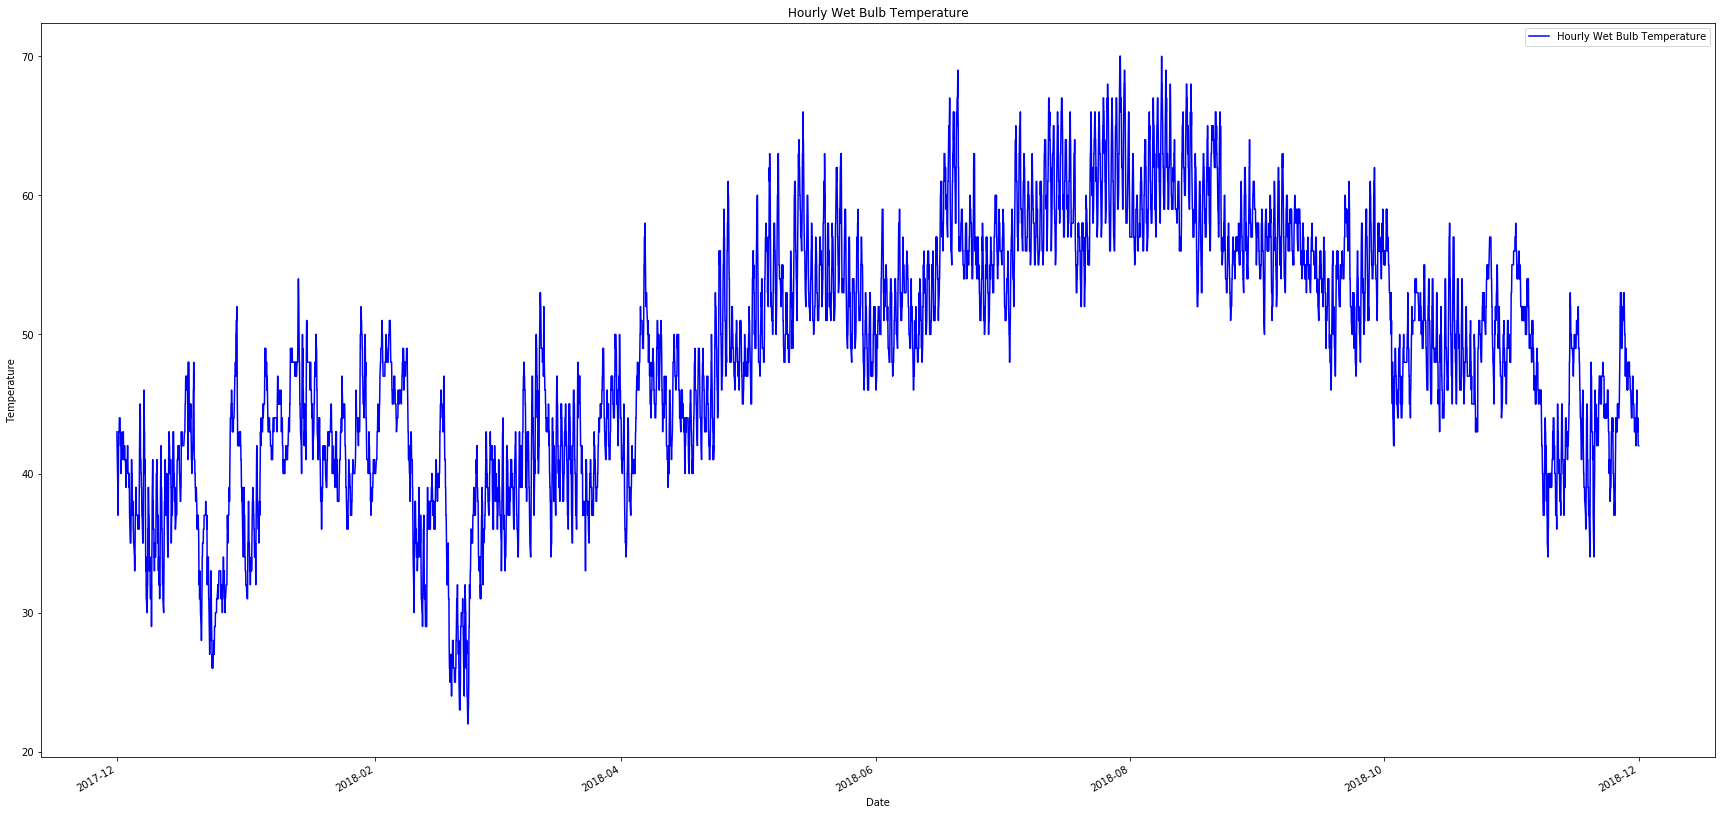

In [14]:
# Hourly Wet Bulb Temperature
plt.figure(figsize=(30,15))
eda_df.HourlyWetBulbTemperature.plot(color='blue', label='Hourly Wet Bulb Temperature')
plt.title('Hourly Wet Bulb Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

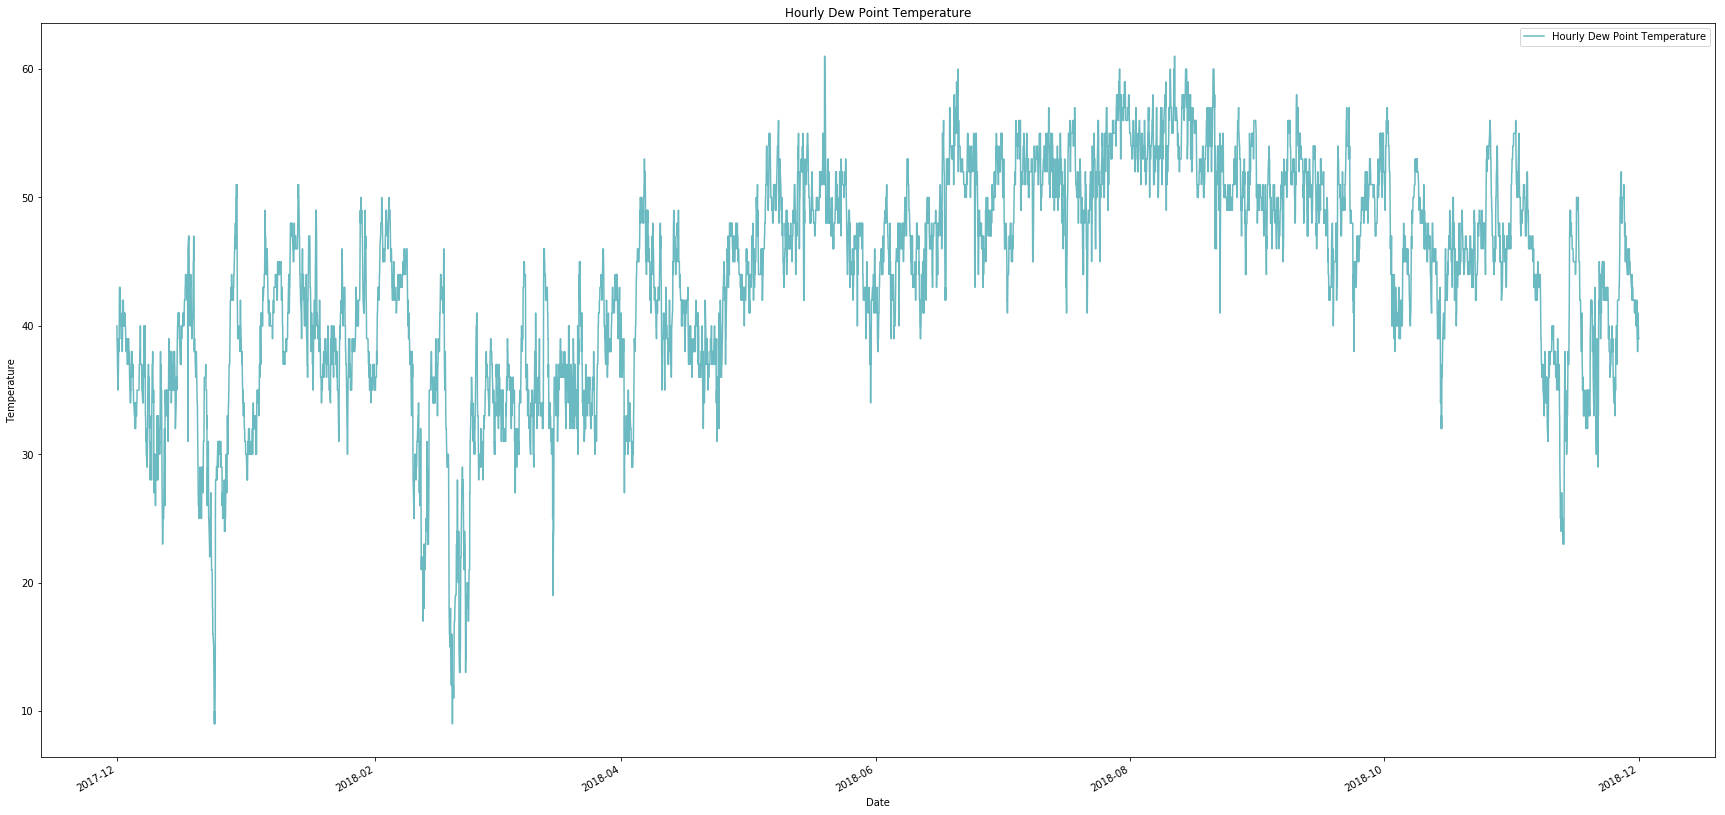

In [15]:
# Hourly Dew Point Temperature
plt.figure(figsize=(30, 15))
eda_df.HourlyDewPointTemperature.plot(color='#6BB9C1', label='Hourly Dew Point Temperature')
plt.title('Hourly Dew Point Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

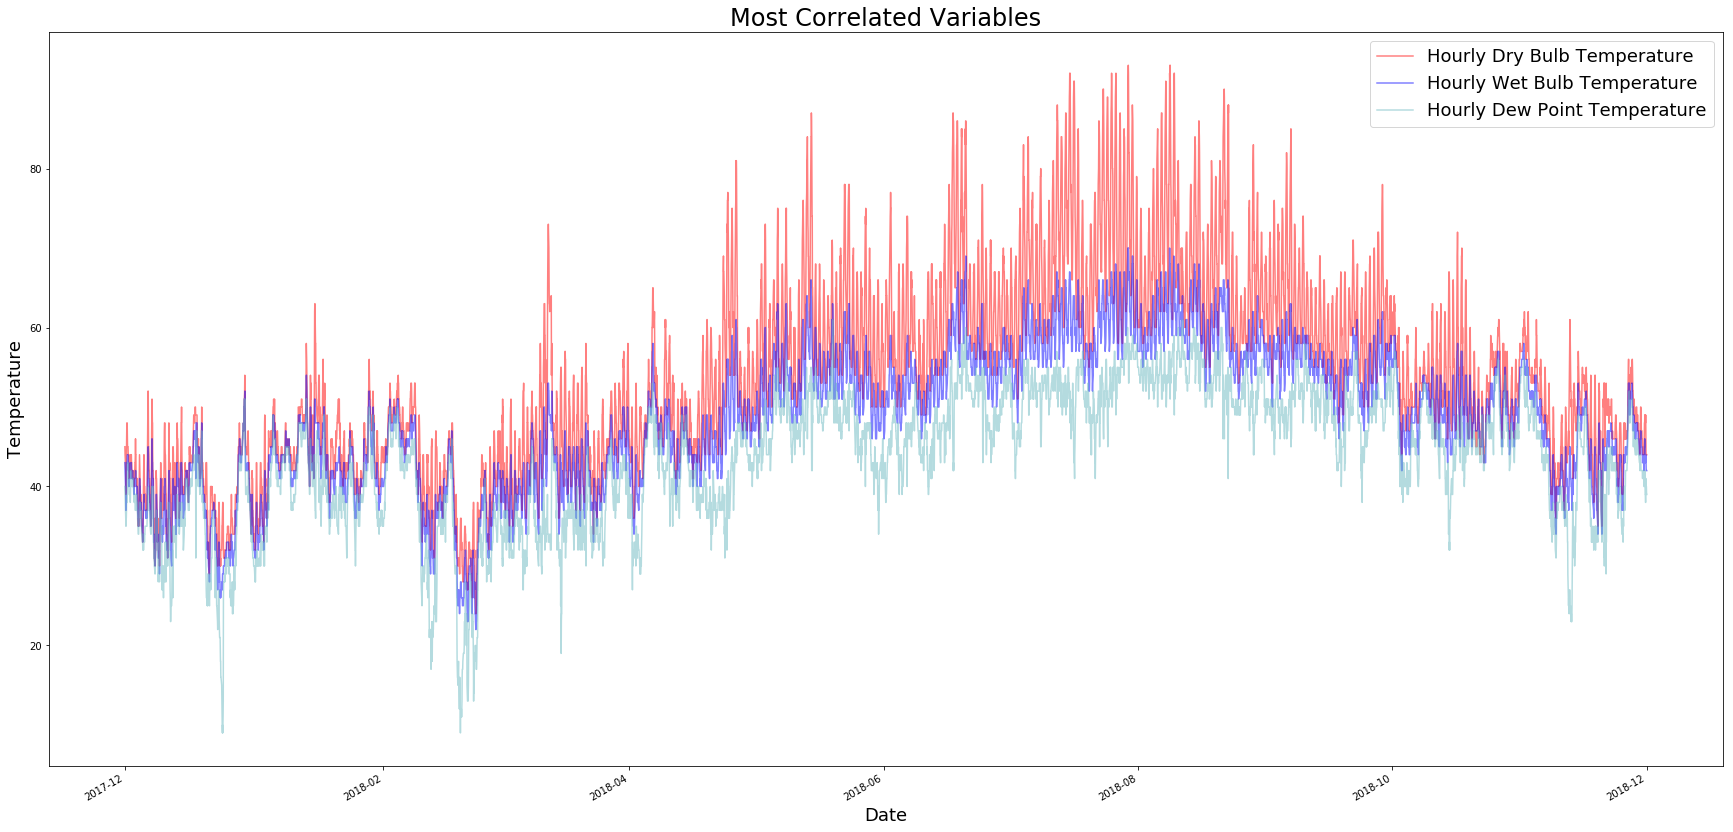

In [58]:
# 
plt.figure(figsize=(30,15))
eda_df.HourlyDryBulbTemperature.plot(color='red', alpha=.5, label='Hourly Dry Bulb Temperature')
eda_df.HourlyWetBulbTemperature.plot(color='blue', alpha=.5, label='Hourly Wet Bulb Temperature')
eda_df.HourlyDewPointTemperature.plot(color='#6BB9C1', alpha=.5, label='Hourly Dew Point Temperature')
plt.title('Most Correlated Variables', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Temperature', fontsize=18)
plt.legend(fontsize=18)
plt.show()

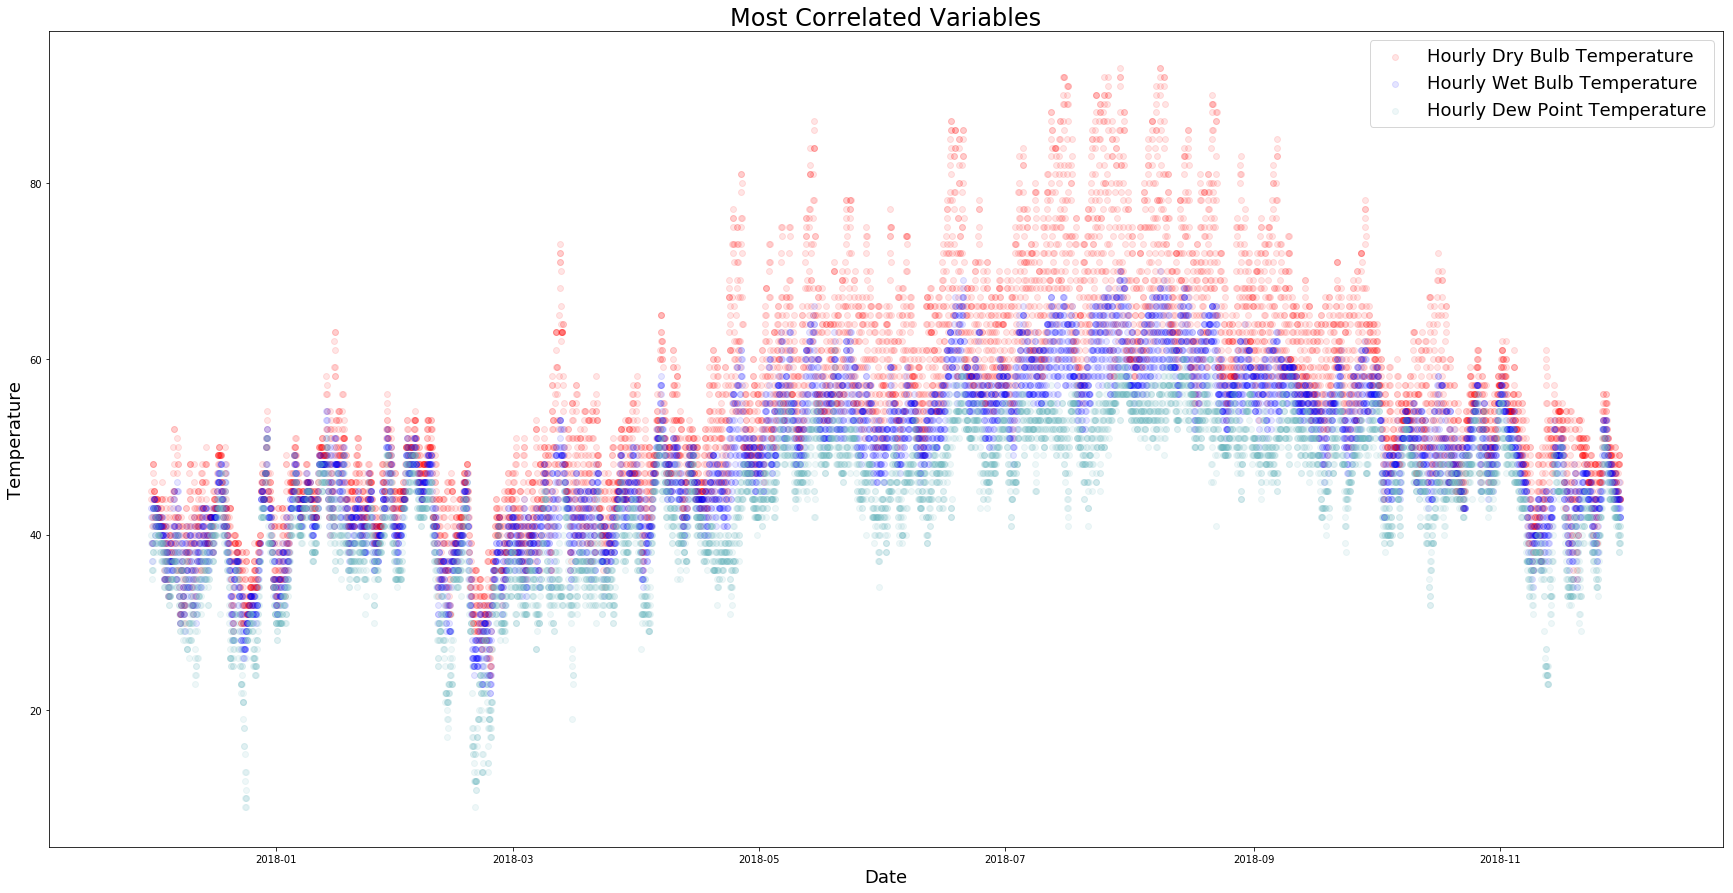

In [79]:
# Scatter plots
plt.figure(figsize=(30, 15))
plt.scatter(eda_df.index, eda_df.HourlyDryBulbTemperature, color='red', alpha=.1, label='Hourly Dry Bulb Temperature')
plt.scatter(eda_df.index, eda_df.HourlyWetBulbTemperature, color='blue', alpha=.1, label='Hourly Wet Bulb Temperature')
plt.scatter(eda_df.index, eda_df.HourlyDewPointTemperature, color='#6BB9C1', alpha=.1, label='Hourly Dew Point Temperature')
plt.title('Most Correlated Variables', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Temperature', fontsize=18)
plt.legend(fontsize=18)
plt.show()

## Adding variables

In [49]:
# Adding column for the weekday, value is between 0-6, Monday = 0 Tuesday = 1 ... Sunday = 6
date_weekday_col = [i.weekday() for i in eda_df.index]
eda_df['weekday'] = date_weekday_col

# Adding day of the week string column
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_str_col = [weekdays[weekday] for weekday in eda_df.weekday]
eda_df['weekday_str'] = weekday_str_col

# Adding column for the month number
month_col = [i.month for i in eda_df.index]
eda_df['month'] = month_col

# Adding column for month name
month_name_col = [i.strftime('%B') for i in eda_df.index]
eda_df['month_str'] = month_name_col

# Add column for if a flight was delayed, 1 = delayed
delayed_col = [-1 if delay < 0 else 1 if delay > 0 else 0 for delay in eda_df.avg_delay]
eda_df['delayed'] = delayed_col
eda_df.head()


,DATE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlySeaLevelPressure,HourlyStationPressure,HourlyPressureChange,HourlyPressureTendency,HourlyVisibility,HourlyWindSpeed,...,wind_east,wind_south,wind_west,join_time,avg_delay,weekday,weekday_str,delayed,month,month_str
DATE,,,,,,,,,,,,,,,,,,,,,
2017-12-01 00:53:00,2017-12-01T00:53:00,30.14,40.0,45.0,30.16,29.67,-0.00,3.0,10.0,13.0,...,0,1,0,2017120100,-6.600000,4,Friday,-1,12,December
2017-12-01 01:53:00,2017-12-01T01:53:00,30.13,39.0,44.0,30.16,29.66,0.00,0.0,10.0,10.0,...,0,1,0,2017120101,-10.000000,4,Friday,-1,12,December
2017-12-01 05:53:00,2017-12-01T05:53:00,30.08,36.0,42.0,30.10,29.61,0.00,0.0,10.0,10.0,...,0,1,0,2017120105,-3.160000,4,Friday,-1,12,December
2017-12-01 06:53:00,2017-12-01T06:53:00,30.07,35.0,39.0,30.09,29.60,0.04,6.0,10.0,8.0,...,0,1,0,2017120106,1.187500,4,Friday,1,12,December
2017-12-01 07:53:00,2017-12-01T07:53:00,30.06,36.0,41.0,30.09,29.59,0.00,0.0,10.0,7.0,...,0,1,0,2017120107,4.147541,4,Friday,1,12,December


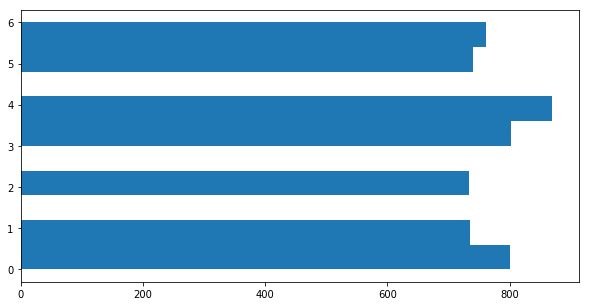

In [38]:
# Get only delayed flights
delayed = eda_df[eda_df.delayed == 1]

# Histogram of weekdays and their delayed fights
plt.figure(figsize=(10, 5))
plt.hist(delayed.weekday, orientation='horizontal')

plt.show()


In [20]:
delayed.head()

,DATE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlySeaLevelPressure,HourlyStationPressure,HourlyPressureChange,HourlyPressureTendency,HourlyVisibility,HourlyWindSpeed,...,cloud_0,wind_north,wind_east,wind_south,wind_west,join_time,avg_delay,weekday,weekday_str,delayed
DATE,,,,,,,,,,,,,,,,,,,,,
2017-12-01 06:53:00,2017-12-01T06:53:00,30.07,35.0,39.0,30.09,29.60,0.04,6.0,10.0,8.0,...,1,0,0,1,0,2017120106,1.187500,4,Friday,1
2017-12-01 07:53:00,2017-12-01T07:53:00,30.06,36.0,41.0,30.09,29.59,0.00,0.0,10.0,7.0,...,0,0,0,1,0,2017120107,4.147541,4,Friday,1
2017-12-01 08:53:00,2017-12-01T08:53:00,30.06,36.0,42.0,30.08,29.59,0.00,0.0,10.0,9.0,...,1,0,0,1,0,2017120108,5.205128,4,Friday,1
2017-12-01 09:53:00,2017-12-01T09:53:00,30.06,37.0,44.0,30.09,29.59,0.01,5.0,10.0,7.0,...,0,0,0,1,0,2017120109,0.476190,4,Friday,1
2017-12-01 10:53:00,2017-12-01T10:53:00,30.05,39.0,47.0,30.07,29.58,0.00,0.0,10.0,11.0,...,0,0,0,1,0,2017120110,4.186047,4,Friday,1


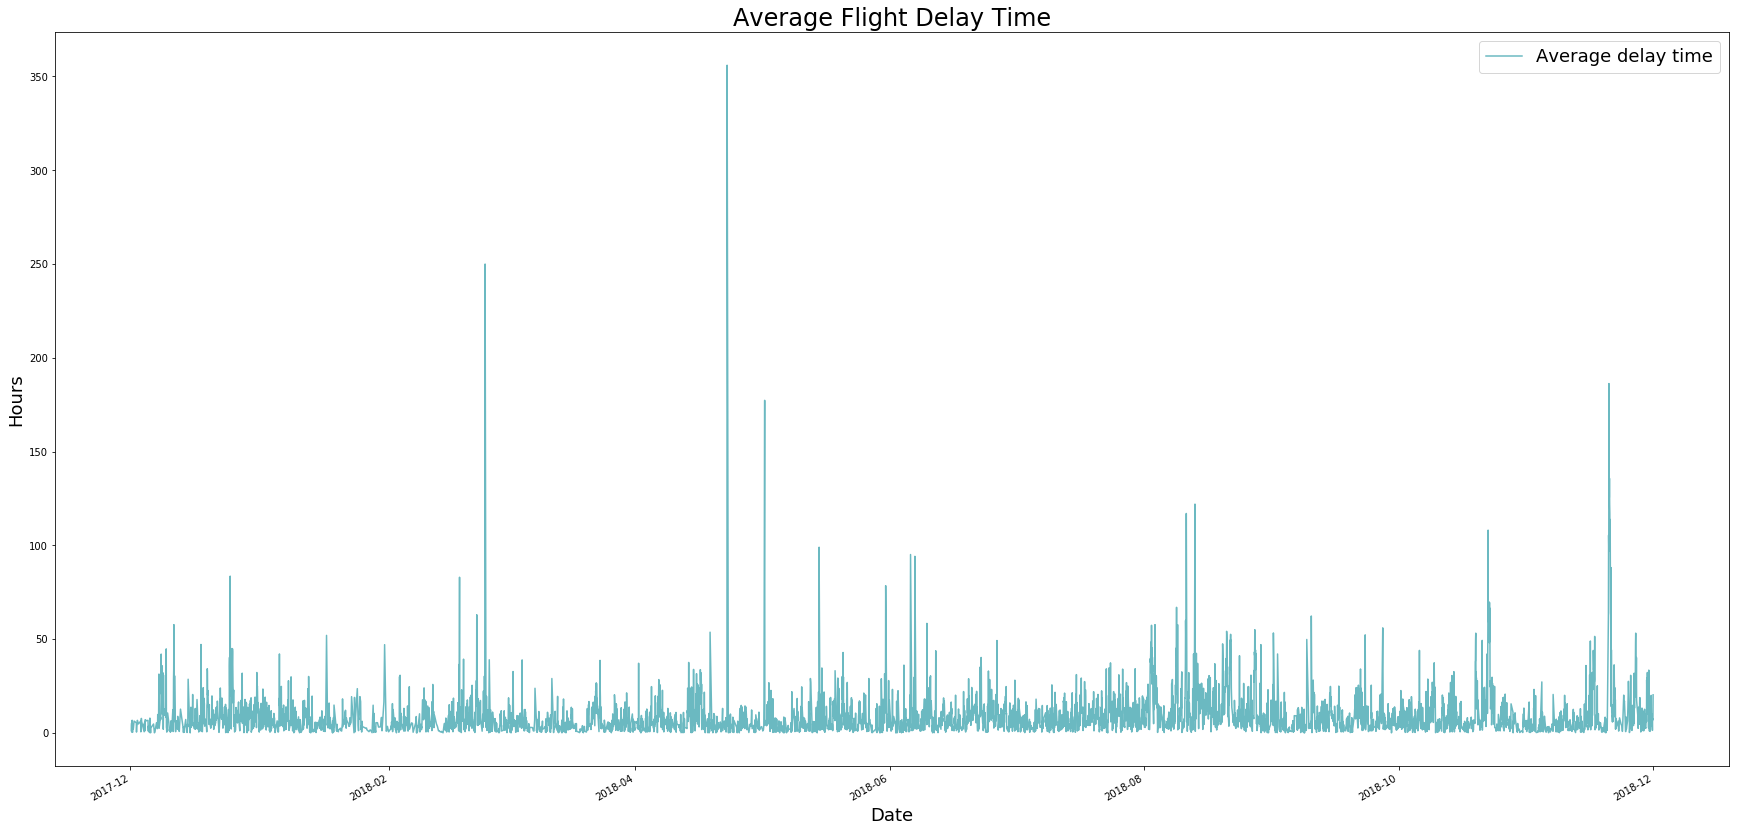

In [21]:
# Just delays
plt.figure(figsize=(30,15))
delayed.avg_delay.plot(color='#6BB9C1', label='Average delay time')
plt.title('Average Flight Delay Time', fontsize=24)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Hours', fontsize=18)
plt.legend(fontsize=18)
plt.show()

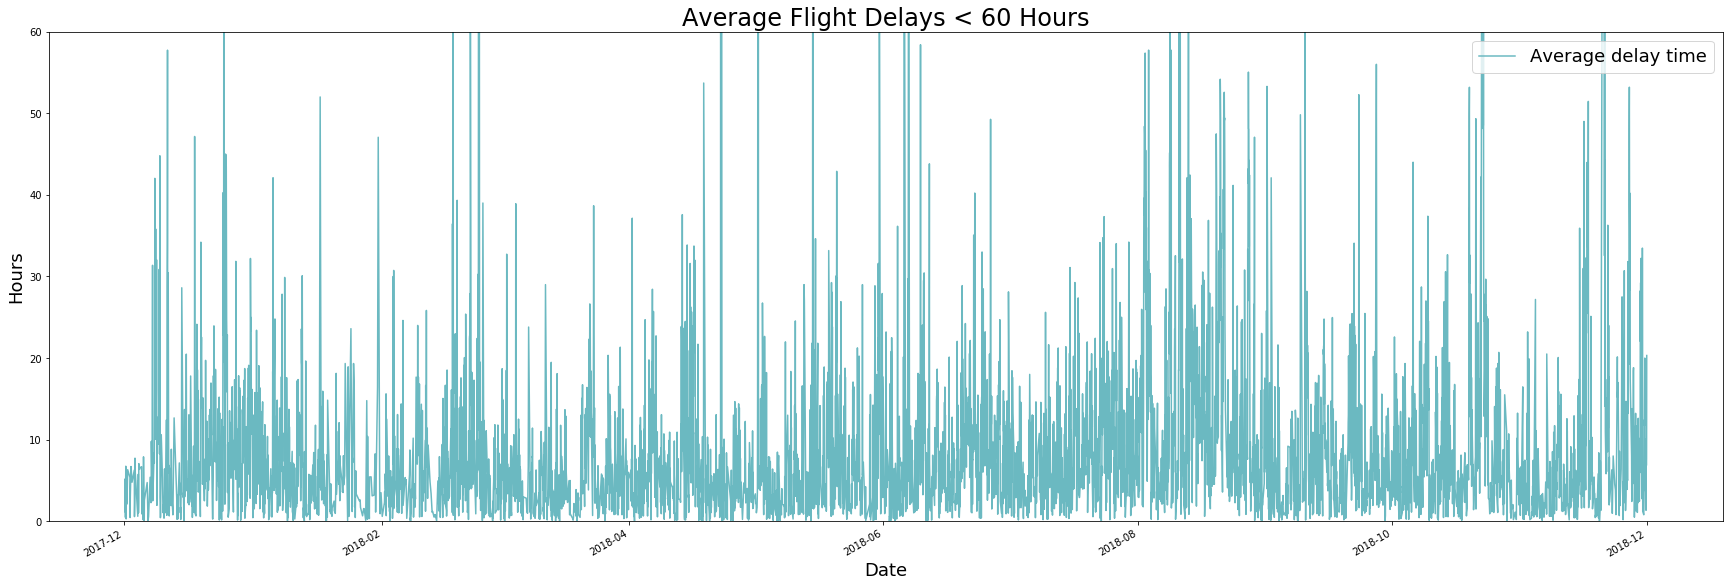

In [55]:
# Plots only the flights that are less than 60 hours delayed
fig = plt.figure(figsize=(30,10))
axes = fig.add_subplot(111)
axes.set_ylim(top=60, bottom=0)
delayed.avg_delay.plot(color='#6BB9C1', label='Average delay time')
plt.title('Average Flight Delays < 60 Hours', fontsize=24)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Hours', fontsize=18)
plt.legend(fontsize=18)
plt.show()


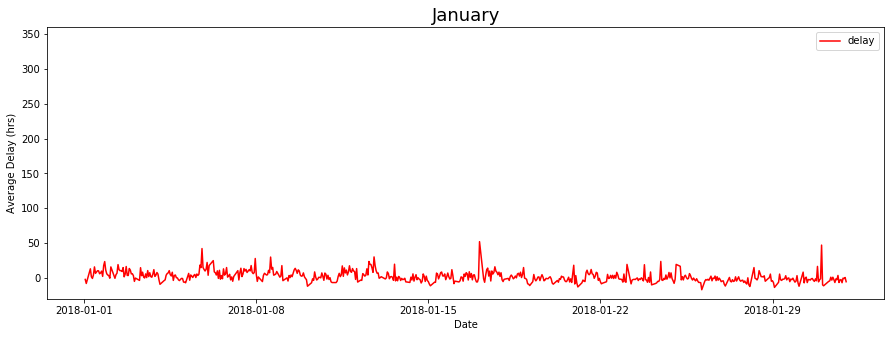

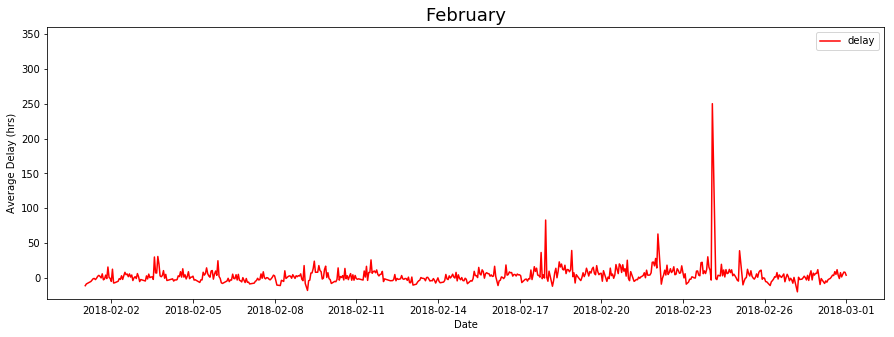

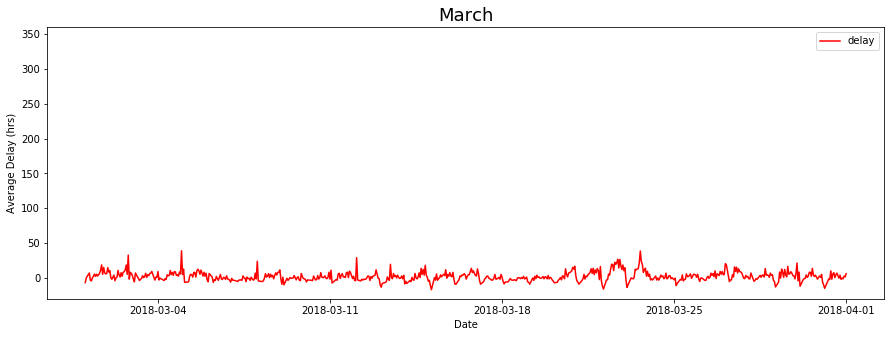

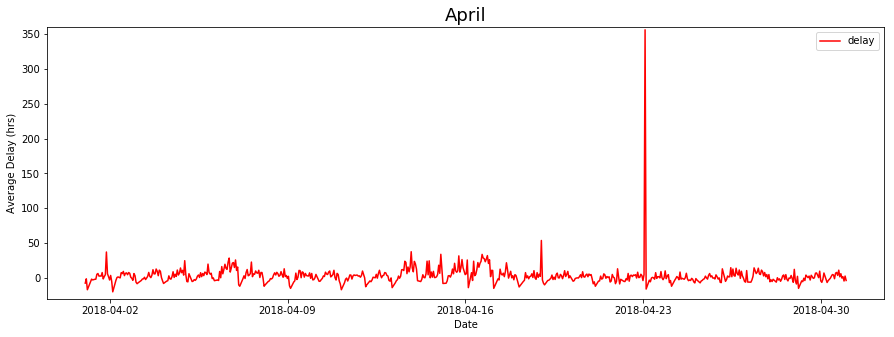

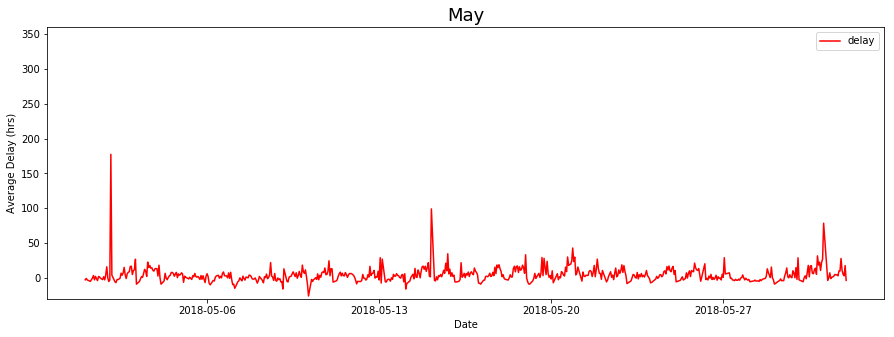

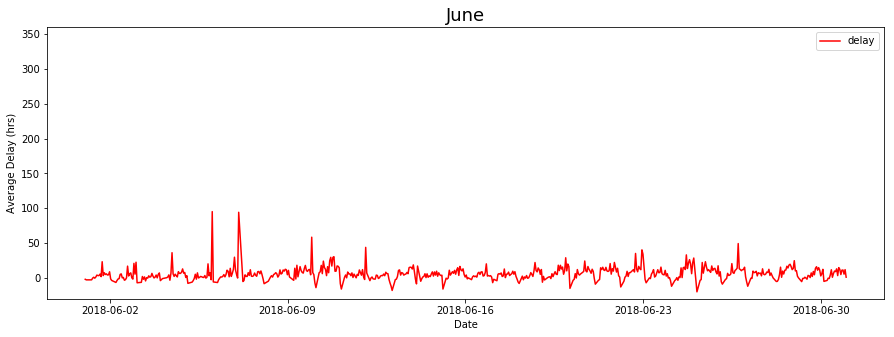

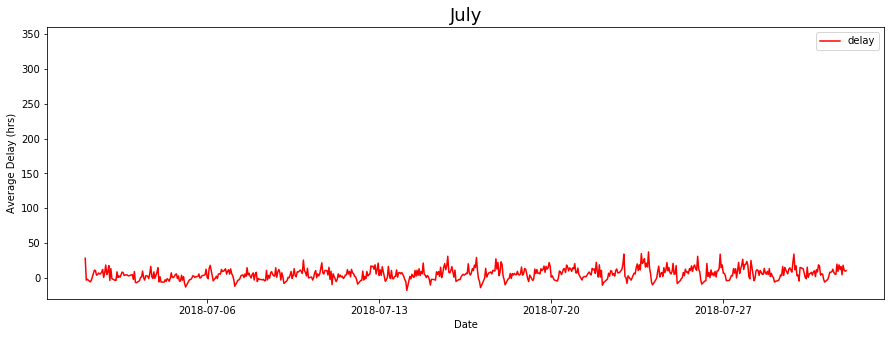

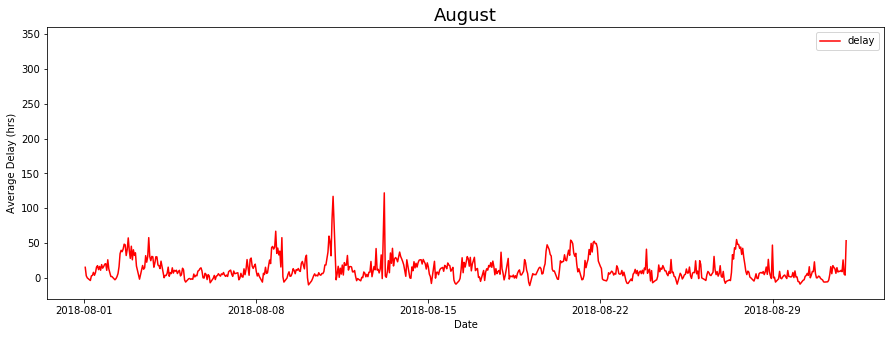

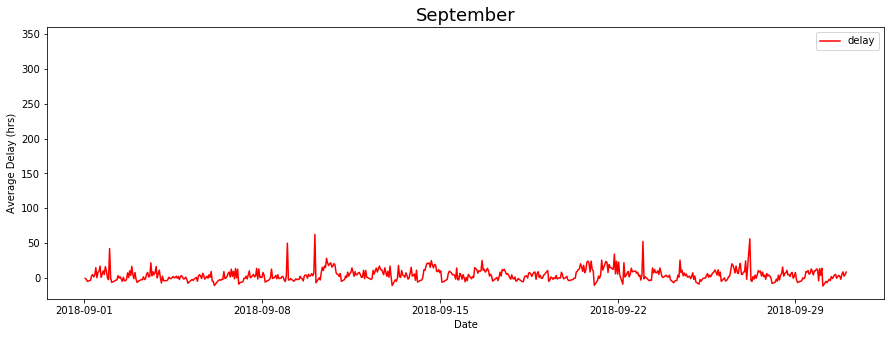

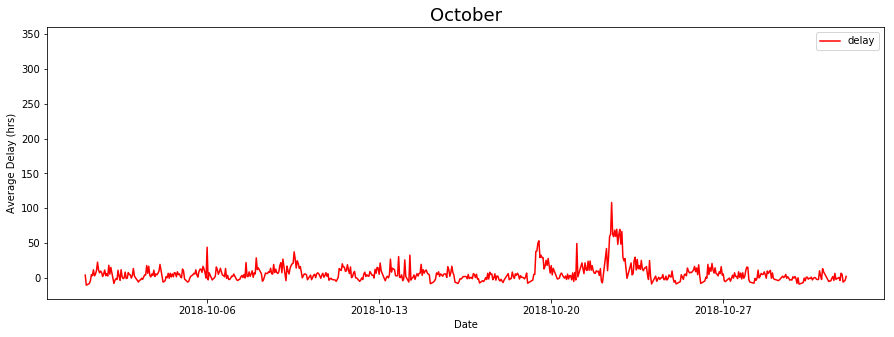

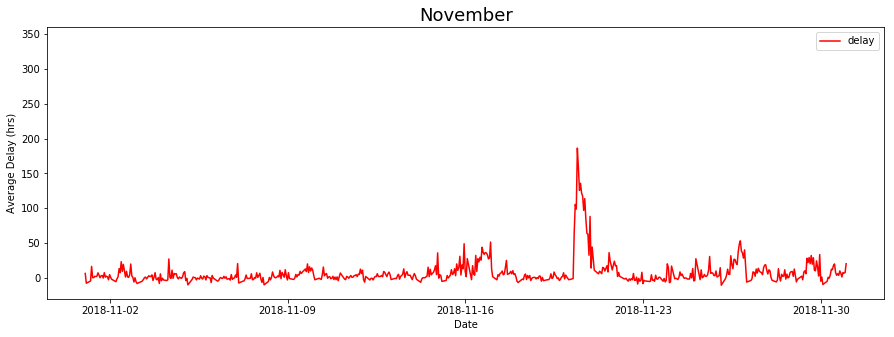

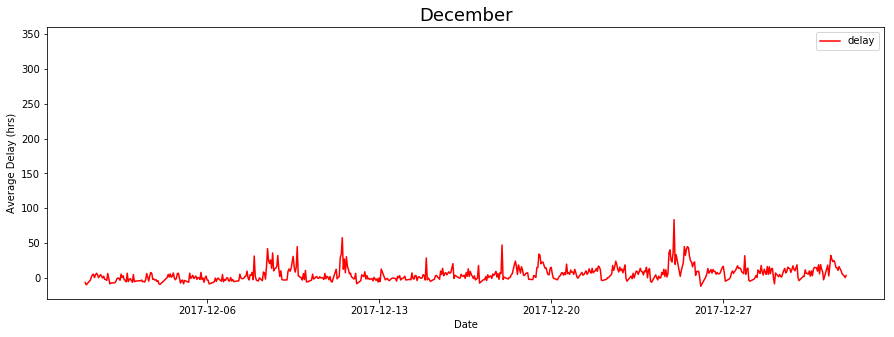

In [78]:
# Get delays for every month
# Saves each year as a png

months = np.unique(eda_df.month)

for month in months:
    fig = plt.figure(figsize=(15, 5))
    axes = fig.add_subplot(111)
    axes.set_ylim(top=360, bottom=-30)
    
    curr_month = eda_df[eda_df.month == month]#.sort_values(by='month')
    month_name = curr_month.month_str[0]
    plt.plot(curr_month.index, curr_month.avg_delay, color='red', label='delay')
    
    plt.title(month_name, fontsize=18)
    plt.xlabel('Date')
    plt.ylabel('Average Delay (hrs)')
    plt.legend()
    #path = '../avg-delay-month-' + month_name + '.png'
    #fig.savefig(path)